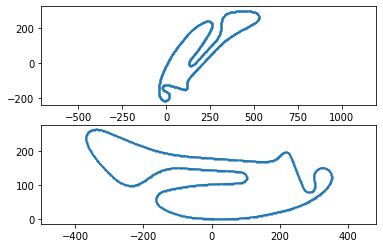

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from BA_Optimization_ML.MaschineLearning.visualisation import json_ImExport
import pandas as pd
from BA_Optimization_ML.Optimization.helper_functions import get_curvature as getKappa
import scipy.spatial.distance as dis
import importlib
import time
from tqdm import tqdm
import time
from sklearn.cluster import AgglomerativeClustering

importlib.reload(getKappa)

#data=json_ImExport.loadData("Kappa_variation_shift10.json")

#kappa=data["list"][1]["Kappa"]


df=pd.read_csv("/Users/leonkiesgen/Documents/Python/BA_Optimization_ML/MaschineLearning/vel_planner/berlin_kappa_3.csv",delimiter=";")

#df=pd.read_csv("/Users/leonkiesgen/Documents/Python/BA_Optimization_ML/Optimization/imput_tracks/ShowTrack.csv")
track=df.to_numpy()

#print("track: ", track[:,1:3])


plt.subplot(211)


def distence(track):
    return np.sqrt(np.power(track[:,0],2)+np.power(track[:,1],2))

def plotKappa(kappa,distence):
    X=[0]
    Y=[0]
    delta_s=distence
    #print("Mean:", distence_mean)
    cumsumkappa=np.cumsum(kappa)
    #print(cumsumkappa)
    for k in cumsumkappa:
        x = delta_s * np.cos(delta_s*k) + X[-1]
        y = delta_s * np.sin(delta_s*k) + Y[-1]
        X.append(x)
        Y.append(y)
    plt.plot(X,Y,"o-",markersize=1)
    plt.axis("equal")


end=len(track)


plt.plot(track[:end,1],track[:end,2],"o",markersize=1)
plt.axis("equal")

vectors=np.diff(track[:end,1:3],axis=0)
distence_abs=np.mean(distence(vectors))

plt.subplot(212)
#-------------------------------------
#- wy to i have to multipy with 3 ? --
#-------------------------------------
plotKappa(track[:end,3],distence_abs)
    


In [2]:
X=[0]
Y=[0]
delta_s=2

distence_abs=distence(track[:100,1:3])

In [3]:
k=-np.pi+0.1
x = delta_s * np.cos(k) + X[-1]
y = delta_s * np.sin(k) + Y[-1]
X.append(x)
Y.append(y)

In [4]:
print(X,Y)

[0, -1.9900083305560514] [0, -0.19966683329365673]


In [5]:
from BA_Optimization_ML.MaschineLearning.visualisation import json_ImExport
data=json_ImExport.loadData("Kappa_variation_2.json")
print(len(data["list"]))
kappa=data["list"][1]["Kappa"]

FileNotFoundError: [Errno 2] No such file or directory: 'Kappa_variation_2.json'

In [2]:
import sys
import os
cwd = os.getcwd()
sys.path.insert(1, cwd+'/BA_Optimization_ML/MaschineLearning/visualisation')
sys.path.insert(1, cwd+ '/BA_Optimization_ML/MaschineLearning/deeplearningModel')
import LogDataImport
import random
import dataprocessing

with tqdm(total=4) as pbar:
    #Json
    #Jsondata=json_ImExport.loadData("/Users/leonkiesgen/Documents/Python/Kappa_variation_vmax100.json")
    #Log File (Monteblanco)
    pbar.update(1)
    

    Logdata_MB=LogDataImport.get_data("/Users/leonkiesgen/Documents/Python/mod_local_trajectory/logs/ltpl/2019_12_01/15_00_59_data.csv")

    #Log File (Berlin)
    pbar.update(1)
    ValLogdata_B=LogDataImport.get_data("/Users/leonkiesgen/Documents/Python/mod_local_trajectory/logs/ltpl/2019_12_05/12_19_36_data.csv")

    #Log File (Modena)
    pbar.update(1)
    ValLogdata_M=LogDataImport.get_data("/Users/leonkiesgen/Documents/Python/mod_local_trajectory/logs/ltpl/2019_12_05/15_41_27_data.csv")

    #Log File (zalazone)
    pbar.update(1)
    ValLogdata_Z=LogDataImport.get_data("/Users/leonkiesgen/Documents/Python/mod_local_trajectory/logs/ltpl/2019_12_05/15_51_25_data.csv")

100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


In [4]:
ClusterNumber=10

import analiyseDataset as aD
importlib.reload(aD)
result,cluster,dataset,vlist=aD.cluster([Logdata_MB,ValLogdata_M],ClusterNumber)
print(result)

[2344, 2413, 1475, 4650, 369, 1008, 3108, 16443, 2264, 1476]


[12500, 503, 1330, 1435, 1442, 221, 551, 178, 287, 243]


(503, 10)

0
1
2
3
4
5
6
7
8


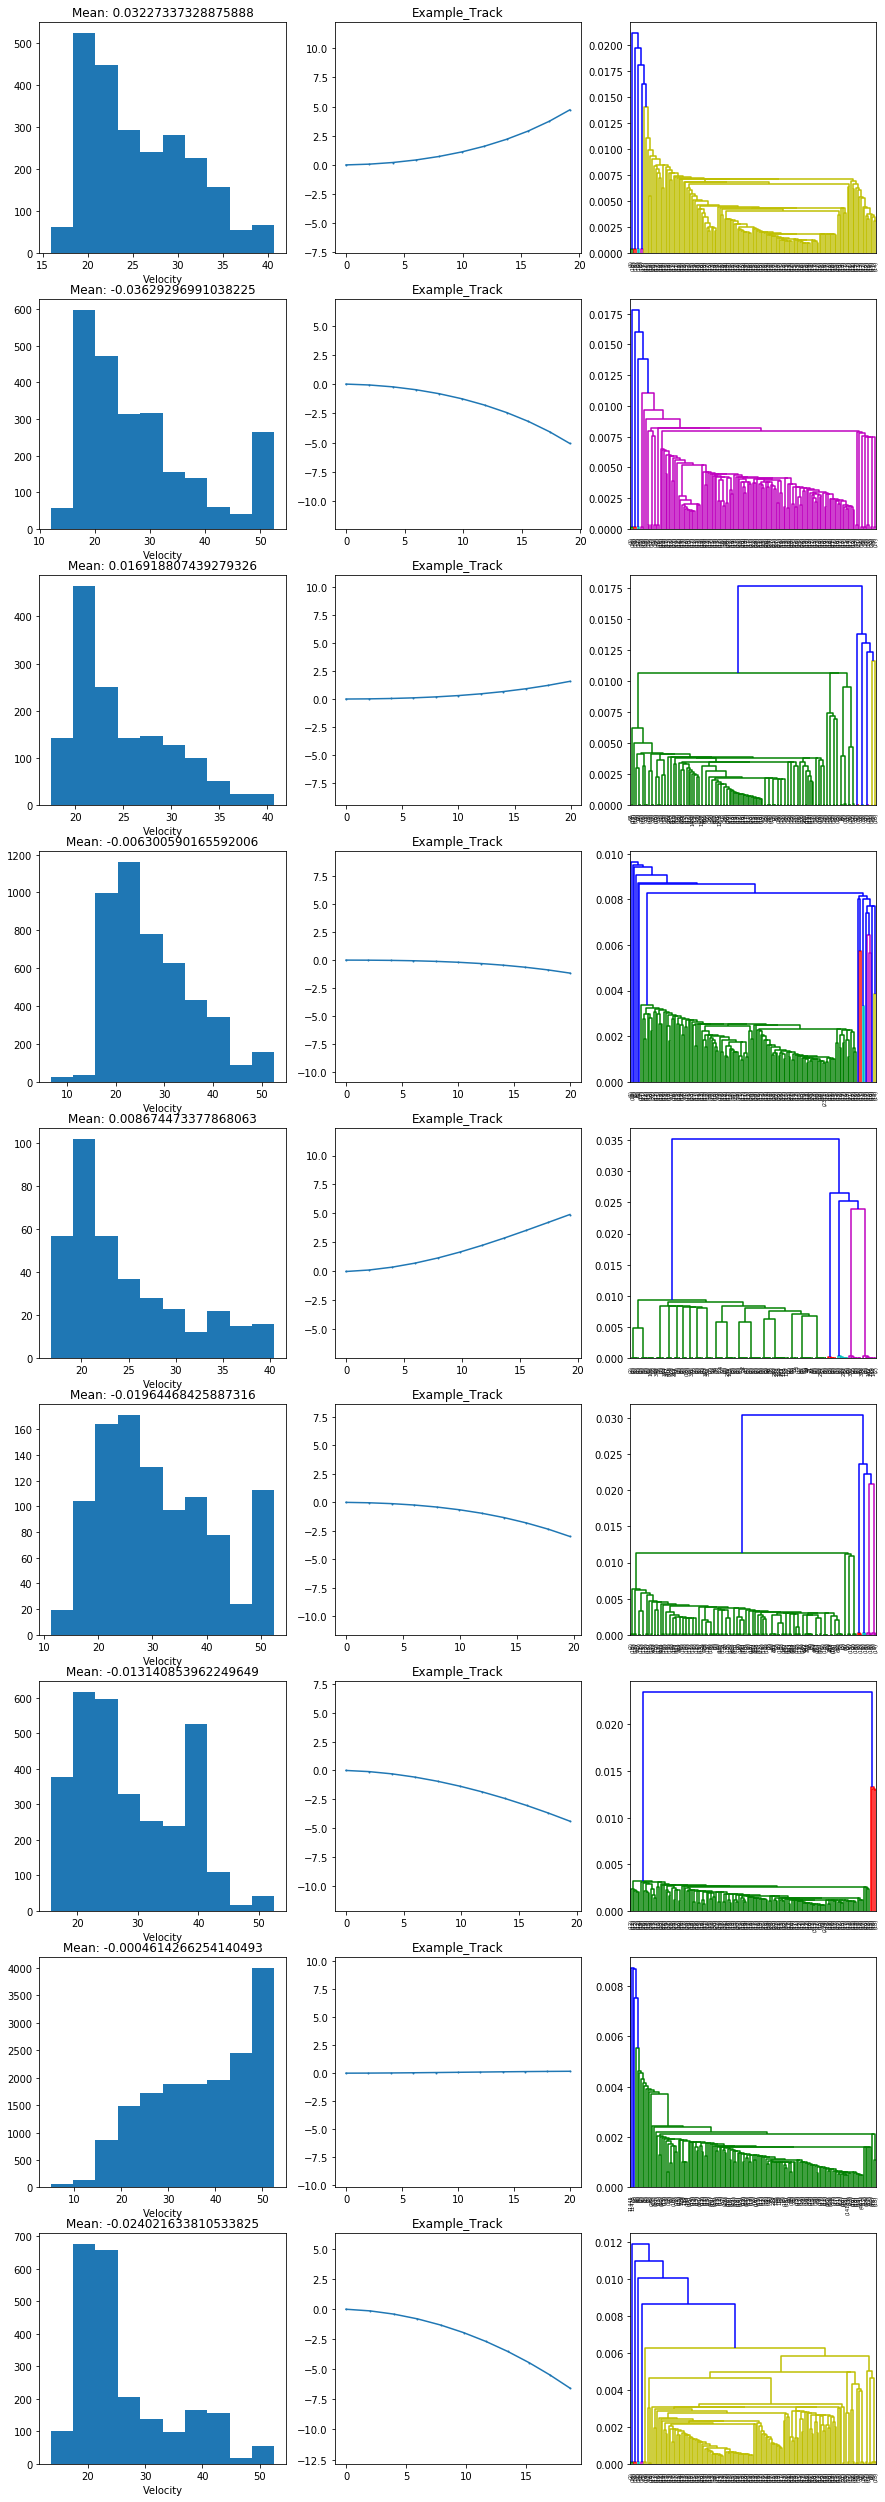

In [5]:
ClusterNumber=10
importlib.reload(aD)
plt.figure(figsize=(15, 50))
for i in range(ClusterNumber-1):
    #Select Subplot Vel
    print(i)

    plt.subplot(ClusterNumber,3,3*(i+1)-2)
    index=np.where(cluster.labels_==i)
    Class=dataset[index]
    VClass=vlist[index]
    plt.hist(VClass)
    plt.title("Mean: "+str(np.mean(Class)))
    plt.xlabel("Velocity")
    #Example Track
    plt.subplot(ClusterNumber,3,3*(i+1)-1)
    plotKappa(Class[0],2)
    plt.title("Example_Track")

    plt.subplot(ClusterNumber,3,3*(i+1))
    aD.hierarchical(Class)


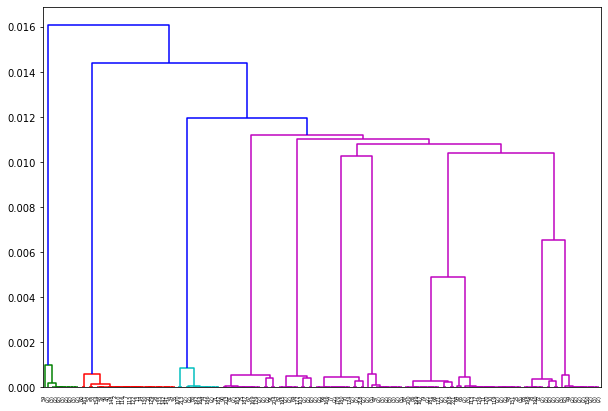

In [74]:
importlib.reload(aD)
aD.hierarchical(Class)

ValueError: num must be 1 <= num <= 4, not 5